### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

# regression task

# 1. read data into dataframe

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
feature_names = []
feature_list = ['NCD_', 'AI_','AS(NA)_','BL_','NAC_','AS(NAC)_','CS_','AT_','NA_', 'ADL_', 'NAD_']

for i in feature_list:
    for j in range(0,7):
        feature_names.append(i+str(j))
feature_names.append('BUZZ')

In [3]:
df = pd.read_csv('Twitter.csv',header = None,names=feature_names,nrows=3000)

use part of the dataset to compute faster 

In [4]:
df.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,BUZZ
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


# 2. exploratory analysis

In [5]:
df.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,BUZZ
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [6]:
df.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,BUZZ
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,77.940000,78.043333,91.396333,104.138000,117.630333,131.566333,133.693333,46.404667,46.509000,55.550667,...,1.066476,1.081847,78.119333,78.220333,91.581667,104.343667,117.835667,131.785000,133.926667,114.572667
std,166.043201,174.349504,207.549122,229.158209,255.684274,280.150377,288.188048,108.548649,113.322298,140.786521,...,0.579288,0.666155,166.290057,174.583173,207.793953,229.405209,255.921824,280.385353,288.403520,258.347665
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,5.000000,6.000000,6.000000,8.000000,8.000000,3.000000,2.000000,3.000000,...,1.000000,1.000000,4.000000,4.000000,5.000000,6.000000,6.000000,8.000000,8.000000,7.000000
50%,24.000000,23.000000,26.500000,30.000000,33.000000,40.000000,38.000000,14.000000,13.000000,15.000000,...,1.000000,1.000000,24.000000,23.000000,27.000000,30.000000,34.000000,40.000000,38.000000,32.000000
75%,78.000000,74.000000,85.000000,95.000000,106.000000,116.000000,115.000000,46.000000,44.000000,50.250000,...,1.062811,1.062500,78.000000,74.000000,85.000000,95.000000,106.250000,116.000000,115.000000,95.500000
max,2066.000000,2054.000000,3601.000000,2613.000000,3601.000000,3601.000000,3601.000000,1609.000000,1658.000000,2836.000000,...,19.000000,19.000000,2069.000000,2061.000000,3601.000000,2613.000000,3601.000000,3601.000000,3601.000000,3107.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 78 columns):
NCD_0        3000 non-null int64
NCD_1        3000 non-null int64
NCD_2        3000 non-null int64
NCD_3        3000 non-null int64
NCD_4        3000 non-null int64
NCD_5        3000 non-null int64
NCD_6        3000 non-null int64
AI_0         3000 non-null int64
AI_1         3000 non-null int64
AI_2         3000 non-null int64
AI_3         3000 non-null int64
AI_4         3000 non-null int64
AI_5         3000 non-null int64
AI_6         3000 non-null int64
AS(NA)_0     3000 non-null float64
AS(NA)_1     3000 non-null float64
AS(NA)_2     3000 non-null float64
AS(NA)_3     3000 non-null float64
AS(NA)_4     3000 non-null float64
AS(NA)_5     3000 non-null float64
AS(NA)_6     3000 non-null float64
BL_0         3000 non-null float64
BL_1         3000 non-null float64
BL_2         3000 non-null float64
BL_3         3000 non-null float64
BL_4         3000 non-null float64
BL_5       

In [8]:
df.shape

(3000, 78)

check missing value

In [9]:
df.isnull().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# 2.1 KNN regressor

# 2.1.1 KNN regressor

In [10]:
#%matplotlib inline
#from pandas.plotting import scatter_matrix

X = df.drop('BUZZ',axis = 1).astype('int')
y = df['BUZZ'].astype('int')

#attributes = df.columns[:77]
#scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

In [11]:
X.shape

(3000, 77)

In [12]:
X.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6
0,0,2,0,0,1,1,1,0,1,0,...,1,1,1,0,2,0,0,1,1,1
1,2,1,0,0,0,0,4,2,1,0,...,0,0,1,2,1,0,0,0,0,4
2,1,0,0,0,0,4,1,1,0,0,...,0,1,1,1,0,0,0,0,4,1
3,1,0,0,1,0,0,1,1,0,0,...,0,0,1,1,0,0,1,0,0,1
4,0,1,0,0,1,2,3,0,1,0,...,1,1,1,0,1,0,0,1,2,3


In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, shuffle=True, test_size = 0.1,random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

Text(0,0.5,'MSE')

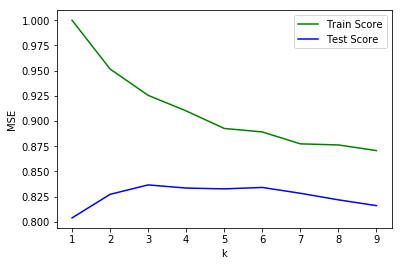

In [14]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

use n = 5 here

In [15]:
pipe_knn = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsRegressor(5))])

In [16]:
pipe_knn.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'))])

In [17]:
print("Train score: {:.4f}".format(pipe_knn.score(X_train, y_train)))
print("Test score: {:.4f}".format(pipe_knn.score(X_test, y_test)))

Train score: 0.8926
Test score: 0.8327


# 2.1.2 cross validation on knn reg

cv score on train set, fold = 5

In [18]:
from sklearn.model_selection import cross_val_score

knn_scores = cross_val_score(KNeighborsRegressor(), X_train, y_train,cv=5)
print("Cross-validation scores: {}".format(knn_scores))
print("Average cross-validation score: {:.4f}".format(knn_scores.mean()))

Cross-validation scores: [0.79484766 0.83183475 0.84937886 0.83998563 0.83930715]
Average cross-validation score: 0.8311


In [19]:
report_table = [['knn', 'k = 5', pipe_knn.score(X_train, y_train), pipe_knn.score(X_test, y_test), knn_scores.mean() ]]


# 2.2 Linear Regression

# 2.2.1 Linear regression using the Normal Equation

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
X.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6
0,0,2,0,0,1,1,1,0,1,0,...,1,1,1,0,2,0,0,1,1,1
1,2,1,0,0,0,0,4,2,1,0,...,0,0,1,2,1,0,0,0,0,4
2,1,0,0,0,0,4,1,1,0,0,...,0,1,1,1,0,0,0,0,4,1
3,1,0,0,1,0,0,1,1,0,0,...,0,0,1,1,0,0,1,0,0,1
4,0,1,0,0,1,2,3,0,1,0,...,1,1,1,0,1,0,0,1,2,3


In [22]:
pipe_lreg = Pipeline([('scaler', MinMaxScaler()), ('lreg', LinearRegression())])

In [23]:
pipe_lreg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('lreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [24]:
print("Train score: {:.4f}".format(pipe_lreg.score(X_train, y_train)))
print("Test score: {:.4f}".format(pipe_lreg.score(X_test, y_test)))

Train score: 0.9021
Test score: 0.9051


# 2.2.2 cross validation on Linear Regression

cv score on train set, fold = 5

In [25]:
lreg_scores = cross_val_score(LinearRegression(), X_train, y_train,cv=5)
print("Cross-validation scores: {}".format(lreg_scores))
print("Average cross-validation score: {:.4f}".format(lreg_scores.mean()))

Cross-validation scores: [0.8823702  0.92689699 0.87135459 0.86478317 0.84312956]
Average cross-validation score: 0.8777


In [26]:
report_table = report_table + [['lreg', '', pipe_lreg.score(X_train, y_train), pipe_lreg.score(X_test, y_test), lreg_scores.mean()]]


Text(0.5,0,'RM')

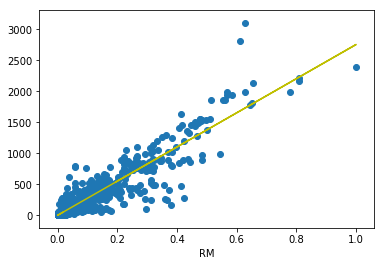

In [27]:
%matplotlib inline

X_train_rm = X_train[:,76].reshape(-1,1)
pipe_lreg.fit(X_train_rm, y_train)
y_predict = pipe_lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'y')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

# 2.3 Ridge

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid search with cross validation on train set

In [29]:
Ridge_train=Ridge()
ridgeparam_train={"alpha":[0.01,0.1,1,10,100]}

grid_ridge_train=GridSearchCV(Ridge_train, ridgeparam_train, cv=5)
grid_ridge_train.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
print("Best alpha: {}".format(grid_ridge_train.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_ridge_train.best_score_))
print("Best estimator:\n{}".format(grid_ridge_train.best_estimator_))

Best alpha: {'alpha': 0.1}
Best cross-validation score: 0.8835
Best estimator:
Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


convert to DataFrame

In [31]:
results_ridge = pd.DataFrame(grid_ridge_train.cv_results_)
display(results_ridge.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003197,0.000340,0.000415,0.000042,0.01,{'alpha': 0.01},0.883160,0.929395,0.877802,0.869056,...,0.882251,0.025854,2,0.904175,0.890060,0.904832,0.906728,0.907462,0.902651,0.006409
1,0.003380,0.000406,0.000417,0.000014,0.1,{'alpha': 0.1},0.880571,0.931827,0.876821,0.871150,...,0.883514,0.025428,1,0.901940,0.886839,0.901983,0.903670,0.904314,0.899749,0.006522
2,0.003366,0.000267,0.000423,0.000031,1,{'alpha': 1},0.875965,0.932555,0.872452,0.870725,...,0.881693,0.026255,3,0.897930,0.881779,0.898065,0.897908,0.899799,0.895096,0.006696
3,0.003148,0.000153,0.000422,0.000023,10,{'alpha': 10},0.859945,0.941774,0.866869,0.841115,...,0.869381,0.037869,4,0.882398,0.864144,0.882753,0.881909,0.885448,0.879330,0.007692
4,0.003541,0.000234,0.000453,0.000018,100,{'alpha': 100},0.779615,0.882125,0.805908,0.720207,...,0.791239,0.053255,5,0.798067,0.767654,0.798176,0.807921,0.809055,0.796175,0.014999


average train score and test score

In [32]:
print("Mean train score:")
print(results_ridge[results_ridge['param_alpha']==0.1]['mean_train_score'])
print("Mean test score:")
print(results_ridge[results_ridge['param_alpha']==0.1]['mean_test_score'])

Mean train score:
1    0.899749
Name: mean_train_score, dtype: float64
Mean test score:
1    0.883514
Name: mean_test_score, dtype: float64


In [33]:
%matplotlib inline
scores = np.array(results_ridge.mean_test_score)

# plot the mean cross-validation scores
#mglearn.tools.heatmap(scores, xlabel='alpha', xticklabels=param_grid['alpha'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [34]:
scores

array([0.88225089, 0.88351404, 0.88169306, 0.86938136, 0.79123927])

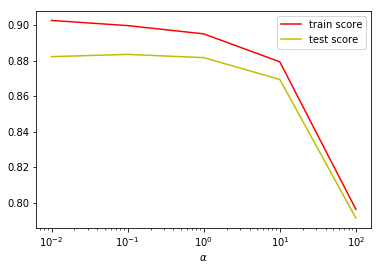

In [35]:
alpha = [0.01,0.1,1,10,100]
plt.plot(alpha,results_ridge['mean_train_score'],label='train score',c='r')
plt.plot(alpha,results_ridge['mean_test_score'],label='test score',c='y')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

In [36]:
report_table = report_table + [['ridge', 'alpha = 0.1', results_ridge.loc[2,'mean_train_score'], results_ridge.loc[2,'mean_test_score'], grid_ridge_train.best_score_]]


# 2.4 Lasso

In [37]:
from sklearn.linear_model import Lasso

grid search with corss validation

In [38]:
Lasso_train=Lasso()
lassoparam_train={"alpha":[0.01,0.1,1,10,100]}

grid_lasso_train=GridSearchCV(Lasso_train, lassoparam_train, cv=5)
grid_lasso_train.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
print("Best alpha: {}".format(grid_lasso_train.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_lasso_train.best_score_))
print("Best estimator:\n{}".format(grid_lasso_train.best_estimator_))

Best alpha: {'alpha': 0.1}
Best cross-validation score: 0.8845
Best estimator:
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


convert to DataFrame

In [40]:
results_lasso = pd.DataFrame(grid_lasso_train.cv_results_)
display(results_lasso.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.055269,0.003506,0.000474,0.000028,0.01,{'alpha': 0.01},0.882417,0.929710,0.877877,0.870103,...,0.882224,0.026057,3,0.902908,0.888828,0.903669,0.905808,0.906526,0.901548,0.006497
1,0.010107,0.003108,0.000401,0.000039,0.1,{'alpha': 0.1},0.880614,0.930522,0.873713,0.876775,...,0.884458,0.023989,1,0.898358,0.883188,0.899044,0.898375,0.900622,0.895917,0.006418
2,0.007060,0.003504,0.000417,0.000037,1,{'alpha': 1},0.879385,0.930570,0.869342,0.873171,...,0.882826,0.024553,2,0.893181,0.878551,0.894898,0.892774,0.896029,0.891086,0.006377
3,0.002688,0.000096,0.000346,0.000016,10,{'alpha': 10},0.658930,0.717423,0.694401,0.665990,...,0.686481,0.021370,4,0.681794,0.662859,0.704485,0.674385,0.719085,0.688522,0.020458
4,0.002434,0.000128,0.000339,0.000010,100,{'alpha': 100},-0.000002,-0.000082,-0.000063,-0.000033,...,-0.000063,0.000045,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


average train score and test score

In [41]:
print("Mean train score:")
print(results_lasso[results_lasso['param_alpha']==0.1]['mean_train_score'])
print("Mean test score:")
print(results_lasso[results_lasso['param_alpha']==0.1]['mean_test_score'])

Mean train score:
1    0.895917
Name: mean_train_score, dtype: float64
Mean test score:
1    0.884458
Name: mean_test_score, dtype: float64


In [42]:
%matplotlib inline
scores = np.array(results_lasso.mean_test_score)

In [43]:
scores

array([ 8.82224353e-01,  8.84457570e-01,  8.82825670e-01,  6.86480998e-01,
       -6.32171903e-05])

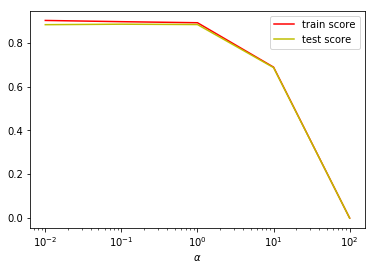

In [44]:
alpha = [0.01,0.1,1,10,100]
plt.plot(alpha,results_lasso['mean_train_score'],label='train score',c='r')
plt.plot(alpha,results_lasso['mean_test_score'],label='test score',c='y')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

In [45]:
report_table = report_table + [['lasso', 'alpha = 0.1', results_lasso.loc[2,'mean_train_score'], results_lasso.loc[2,'mean_test_score'], grid_lasso_train.best_score_]]

# 2.5 Polynomial Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures

array([[0.0185816 ],
       [0.00309693],
       [0.00247755],
       ...,
       [0.03344689],
       [0.04862186],
       [0.19665531]])

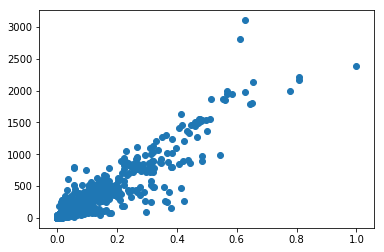

In [47]:
X_train_1 = X_train[:,76].reshape(-1,1)
plt.scatter(X_train_1,y_train)
X_train_1

In [48]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    pipe_lreg.fit(X_train_poly, y_train)
    train_score_list.append(pipe_lreg.score(X_train_poly, y_train))
    test_score_list.append(pipe_lreg.score(X_test_poly, y_test))

In [49]:
print(train_score_list)
print(test_score_list)

[0.9020586013464508, 0.9926447943217206]
[0.905147662831242, -6.199600620742207e+17]


Text(0,0.5,'MSE')

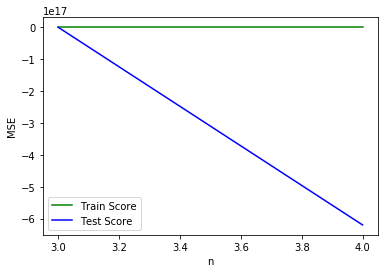

In [50]:
x_axis = range(3,5)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n')
plt.ylabel('MSE')

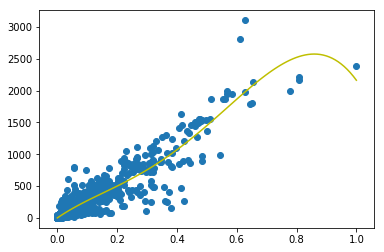

In [51]:
poly = PolynomialFeatures(4)
X_train_poly = poly.fit_transform(X_train_1)
pipe_lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = pipe_lreg.predict(x_poly)

plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'y')

In [52]:
report_table = report_table + [['poly_reg', 'n = 4', train_score_list[1],test_score_list[0],'']]

# 2.6 Linear SVM 

In [53]:
X_train.shape

(2700, 77)

In [54]:
from sklearn.svm import LinearSVC
import mglearn

linear_svm = LinearSVC()

In [55]:

linear_svm = LinearSVC().fit(X_train, y_train)

In [56]:
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (465, 77)
Intercept shape:  (465,)


In [57]:
report_table = report_table + [['linear_svm', '', '','','']]

# 2.7 SVM with kernel trick

In [58]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV

grid search with cross validation 

In [59]:
SVC_train=SVC()
svcparam_train={'C': [ 0.01, 0.1, 1, 10, 100],
                  'gamma': [ 0.01, 0.1, 1, 10, 100]}

grid_svc_train=GridSearchCV(SVC_train, svcparam_train, cv=5)
grid_svc_train.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
print("Best alpha: {}".format(grid_svc_train.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svc_train.best_score_))
print("Best estimator:\n{}".format(grid_svc_train.best_estimator_))

Best alpha: {'C': 10, 'gamma': 100}
Best cross-validation score: 0.1030
Best estimator:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


convert to df

In [61]:
results_svc = pd.DataFrame(grid_svc_train.cv_results_)
display(results_svc.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.117135,0.234527,0.850485,0.133536,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.046875,0.067979,0.077393,...,0.070741,0.018447,20,0.08137,0.071462,0.069262,0.067371,0.066205,0.071134,0.005419
1,1.233880,0.271431,0.837617,0.179692,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.046875,0.067979,0.077393,...,0.070741,0.018447,20,0.08137,0.071462,0.069262,0.067371,0.066205,0.071134,0.005419
2,1.553703,0.343043,0.851111,0.187310,0.01,1,"{'C': 0.01, 'gamma': 1}",0.046875,0.067979,0.077393,...,0.070741,0.018447,20,0.08137,0.071462,0.069262,0.067371,0.066205,0.071134,0.005419
3,1.821421,0.389169,0.840351,0.178342,0.01,10,"{'C': 0.01, 'gamma': 10}",0.046875,0.067979,0.077393,...,0.070741,0.018447,20,0.08137,0.071462,0.069262,0.067371,0.066205,0.071134,0.005419
4,2.001148,0.415160,1.160027,0.217573,0.01,100,"{'C': 0.01, 'gamma': 100}",0.046875,0.067979,0.077393,...,0.070741,0.018447,20,0.08137,0.071462,0.069262,0.067371,0.066205,0.071134,0.005419


In [62]:
report_table = report_table + [['svm_kernel', 'C = 10, gamma = 100', '','',grid_svc_train.best_score_]]

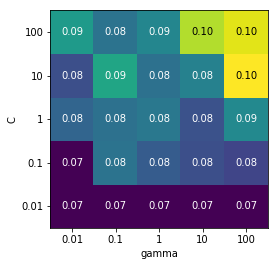

In [63]:
%matplotlib inline
scores = np.array(results_svc.mean_test_score).reshape(5,5)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=svcparam_train['gamma'], ylabel='C', yticklabels=svcparam_train['C'], cmap="viridis")


In [64]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'cross viladation score'])


In [65]:
report.index = report['Model name']

In [66]:
report

,Model name,Model parameter,Train accuracy,Test accuracy,cross viladation score
Model name,,,,,
knn,knn,k = 5,0.892645,0.832686,0.831071
lreg,lreg,,0.902059,0.905148,0.877707
ridge,ridge,alpha = 0.1,0.895096,0.881693,0.883514
lasso,lasso,alpha = 0.1,0.891086,0.882826,0.884458
poly_reg,poly_reg,n = 4,0.992645,0.905148,
linear_svm,linear_svm,,,,
svm_kernel,svm_kernel,"C = 10, gamma = 100",,,0.102963


# use polynomial regression on the whole dataset

In [67]:
df = pd.read_csv('Twitter.csv',header = None,names=feature_names)

In [72]:
X2 = df.drop('BUZZ',axis = 1).astype('int')
y2 = df['BUZZ'].astype('int')

In [73]:
X2_train_org, X2_test_org, y2_train, y2_test = train_test_split(X2,y2, shuffle=True, test_size = 0.1,random_state = 0)

scaler = MinMaxScaler()
X2_train = scaler.fit_transform(X2_train_org)
X2_test = scaler.transform(X2_test_org)

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X2_train_poly = poly.fit_transform(X2_train)
    X2_test_poly = poly.transform(X2_test)
    pipe_lreg.fit(X2_train_poly, y2_train)
    train_score_list.append(pipe_lreg.score(X2_train_poly, y2_train))
    test_score_list.append(pipe_lreg.score(X2_test_poly, y2_test))

In [78]:
print(train_score_list)
print(test_score_list)

[0.9794651651712012, 0.9946470700486448]
[0.890691183808295, -114400743807.56285]
